In [1]:
import torch
import cv2
import torchvision.transforms as transforms
from unprocess import *
from process import *
import matplotlib.pyplot as plt
# from PIL import Image
import numpy as np

In [2]:
# Read the image and convert to RGB
image = cv2.imread("/home/sougato97/Thesis/datasets/LOLdataset/RAW_NoNoiseHigh/high/6.png")

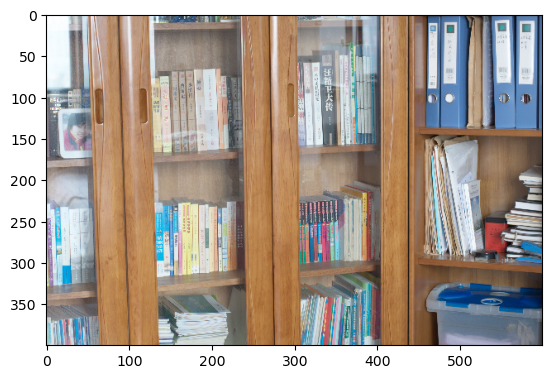

In [3]:
temp = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(temp)

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB color space

In [5]:
# Define the transform
transform = transforms.ToTensor()

In [6]:
# Convert the image to tensor
tensor = transform(image)

Now testing the whole pipeline

In [7]:
un_image, metadata = unprocess(tensor)

Now add noise to the un_image

In [8]:
shot_noise, read_noise = random_noise_levels()

In [9]:
noisy_img = add_noise(un_image, shot_noise, read_noise)

In [12]:
pr_image = process(noisy_img, metadata['red_gain'], metadata['blue_gain'], metadata['cam2rgb'])

blue shape torch.Size([1, 400, 600, 1])
torch.Size([1, 3, 400, 600])


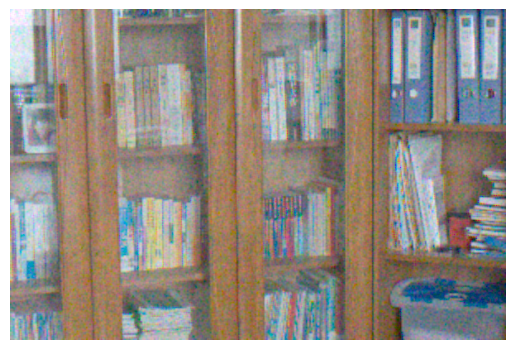

In [13]:
# Display module
temp = pr_image.permute(1, 2, 0)
temp = temp.numpy()
# Display the numpy array as an image
plt.axis("off")
plt.imshow(temp)
plt.show()

In [44]:
def change_brightness(image):
  # Adjust the brightness by a factor (positive or negative)
  brightness_factor = 0.2  # # Decrease Brightness by 50%
  adjusted_image = image * brightness_factor

  # Clamp the pixel values to the valid range of 0-1
  adjusted_image = np.clip(adjusted_image, 0, 1)

  return adjusted_image

In [45]:
dark_image = change_brightness(temp)

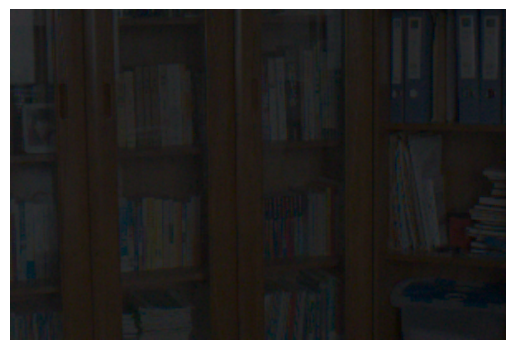

In [46]:
# Display module
plt.axis("off")
plt.imshow(dark_image)
plt.show()